# Computação Evolucionária - TP PSO

## Introdução

## Metodologia

### Função unimodal
A função unimodal escolhida foi a 5 (Different Powers Function)

### Função multimodal
A função multimodal escolhida foi a 8 (Rotated Ackley's Function) 

## Resultados

Inicialmente, é necessário importar as bibliotecas necessárias para o desenvolvimento do trabalho. Está sendo utilizada a versão 3.8.5 do Python, e as bibliotecas `numpy`, `pandas`, `matplotlib` e `seaborn`.

In [109]:
# importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d


O proximo passo é implementar e validar a implementação das funções de teste escolhidas para estudo.

In [33]:
class DifferentPowersFunction:
    """
    Função 5 - Different Powers Function
    """
    def __init__(self, o, D=10, f_star=-1000):
        self.o = o
        self.D = D
        self.f_star = f_star

    def func(self, x):
        z = x - self.o
        z_sum = np.sum([(z[i-1]) ** (2 + 4*(i-1)/(self.D-1)) for i in np.arange(start=1, stop=self.D+1)])
        return np.sqrt(np.sum(z_sum)) + self.f_star


In [69]:
class RotatedAckleysFunction:
    """
    Função 8 - Rotated Ackley's Function
    """
    def __init__(self, o, M1, M2, beta=0.5, alpha=10, D=10, f_star=-700):
        self.o = o
        self.D = D
        self.f_star = f_star
        self.M1 = M1
        self.M2 = M2
        self.beta = 0.5
        self.diag = np.diag([alpha ** ((i-1)/(2*(D-1)))
                             for i in np.arange(start=1, stop=self.D+1)])

    def calculate_t_asy(self, x):
        return np.array([xi if xi <= 0 else xi ** (1 + self.beta*i*np.sqrt(xi)/(self.D-1)) for i, xi in enumerate(x)])

    def func(self, x):
        Tasy = self.calculate_t_asy(x)
        z = self.diag @ self.M2 @ Tasy * (self.M1 @ (x - self.o))
        part1 = -20 * np.exp(-0.2*np.sqrt(np.sum([(z[i]) ** 2 for i in np.arange(start=0, stop=self.D)]) / self.D))
        part2 = -np.exp(np.sum(np.cos(2*np.pi*z)) / self.D)
        return part1 + part2 + 20 + np.e + self.f_star


In [78]:
class RotatedGriewanksFunction:
    """
    Função 10 - Rotated Griewanks's Function
    """
    def __init__(self, o, M1, alpha=100, D=10, f_star=-500):
        self.o = o
        self.D = D
        self.f_star = f_star
        self.M1 = M1
        self.diag = np.diag([alpha ** (i/(2*(D-1))) for i in np.arange(self.D)])

    def calculate_z(self, x):
        return self.diag @ self.M1 @ (6 * (x - self.o))

    def func(self, x):
        z = self.calculate_z(x)
        part1 = np.sum([(z[i]**2)/4000 for i in np.arange(self.D)])
        part2 = -np.prod([np.cos(z[i]/np.sqrt(i+1)) for i in np.arange(self.D)])
        return part1 + part2 + 1 + self.f_star

In [165]:
def plot_contour(func, n, bx=[-100, 100], by=[-100,100]):
    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    h = plt.contour(x,y,z, levels=50, cmap='jet')
    plt.colorbar()
    plt.show()


def plot_surface(func, n, bx=[-100, 100], by=[-100,100]):
    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    ax = plt.axes(projection='3d')
    surf = ax.plot_surface(xv, yv, z, cmap='jet', edgecolor='none')
    ax.contour(xv,yv,z, zdir='z', offset=np.min(z)-100, cmap='jet')
    plt.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

def plot_function_2d(func, n, bx=[-100, 100], by=[-100,100]):
    lb, ub = bx
    x = np.linspace(lb, ub, n)
    lb, ub = by
    y = np.linspace(lb, ub, n)
    xv, yv = np.meshgrid(x, y)
    z = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            z[i,j] = func(np.array([xv[i,j], yv[i,j]]))

    ax1 = plt.subplot(121, projection='3d')
    ax2 = plt.subplot(122)

    ax1.plot_surface(xv, yv, z, cmap='jet', edgecolor='none')
    cs = ax2.contour(x,y,z, cmap='jet', levels=50)
    plt.colorbar(cs, ax=ax2)
    plt.tight_layout()
    plt.show()



In [163]:
# Ler os dados de shift fornecidos
shift_data = pd.read_fwf('data/shift_data.txt', header=None)
# Ler matrizes M
M_D2 = pd.read_fwf('data/M_D2.txt', header=None)
M_D10 = pd.read_fwf('data/M_D10.txt', header=None)

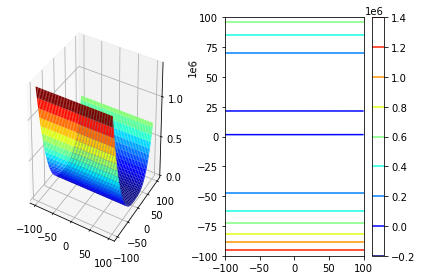

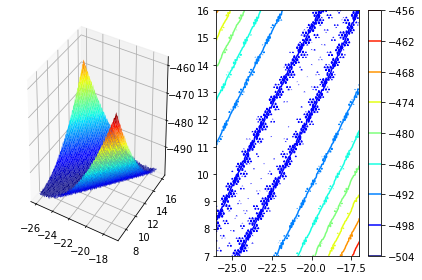

In [166]:

# número de dimensões para gráficos
D_plot = 2
# selecionar um único valor de shift
o_used = shift_data.iloc[0, :D_plot].to_numpy()
# selecionar duas matrizes de rotação
M1 = M_D2.iloc[:2, :].to_numpy()
M2 = M_D2.iloc[2:4, :].to_numpy()

unimodal = DifferentPowersFunction(o_used, D=D_plot)
multimodal = RotatedGriewanksFunction(o_used, M1, D=D_plot)

plot_function_2d(unimodal.func, 100)
plot_function_2d(multimodal.func, 100, bx=[-26,-17],by=[7,16])


## Conclusão